In [1]:
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.models import load_model
import gzip
import numpy as np

import matplotlib.pyplot as plt

# Load the testing dataset for validation.

In [2]:
test_data_zip = gzip.open("data/t10k-images-idx3-ubyte.gz")
test_label_zip = gzip.open("data/t10k-labels-idx1-ubyte.gz")

test_data_zip.read(16)
test_label_zip.read(8)

b"\x00\x00\x08\x01\x00\x00'\x10"

In [3]:
model = load_model("output/my_model")

model.summary()

2022-08-17 23:36:43.894761: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-17 23:36:43.924474: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-17 23:36:43.924828: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-17 23:36:43.925951: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "Image_Classification_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Normaliser (Rescaling)      (None, 28, 28)            0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 64) 

In [4]:
number_img = 10000
img_size = 28

buf = test_data_zip.read(number_img * img_size * img_size)

test_img = np.frombuffer(buf, dtype=np.uint8)
test_img = test_img.reshape(number_img, img_size, img_size)

test_img.shape

(10000, 28, 28)

In [5]:
buf = test_label_zip.read(number_img)

test_label = np.frombuffer(buf, dtype=np.uint8)
test_label = test_label.reshape(number_img)

test_label.shape

(10000,)

In [6]:
filter_test_arr = [label != 8 for label in test_label]

test_label = test_label[filter_test_arr]
test_img = test_img[filter_test_arr]

filter_test_arr = [label == 9 for label in test_label]
test_label[filter_test_arr] = 8

np.unique(test_label, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

In [7]:
model.evaluate(test_img, np.array([[int(i == label_index) for i in range(9)] for label_index in test_label]))

282/282 [==============================] - 1s 2ms/step - loss: 0.0696 - accuracy: 0.8791


[0.0695871114730835, 0.879111111164093]

# Start prediction.

In [8]:
# Feel free to change this value to a number between 0 and 8999.

chosen_index = 100

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Ankle boot |

In [9]:
label_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Ankle boot"]

In [10]:
# Model prediction. Note that the model can be wrong in its prediction since its accuracy.

probab = model.predict(test_img[chosen_index].reshape(1,28,28)) # Set to a numpy array of correct input data.
probab # The model output type was softmax rather than argmax to show probability of model saying which item is which.

1/1 [==============================] - 0s 64ms/step


array([[9.6214527e-01, 3.3363372e-06, 1.5562742e-04, 7.4307703e-05,
        1.4465171e-05, 1.5187071e-08, 3.7606981e-02, 6.4345862e-09,
        3.6599728e-09]], dtype=float32)

In [11]:
# Predicted value.

probab_list = probab.tolist()[0]

max_number = max(probab_list)
index = probab_list.index(max_number)
label_names[index]

'T-shirt/top'

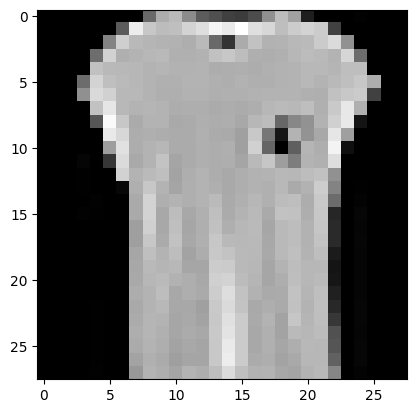

In [12]:
# Show greyscale image input.

plt.imshow(test_img[chosen_index], cmap="gray")

In [13]:
# Ground Truth value.

label_names[test_label[chosen_index]]

'T-shirt/top'